# **AISHA AJAO**# 


##**Final Project: IBM Employee Attribution**

### Import Necessary Libraries

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<br>

### Load Data

* You can download the data from [here](https://drive.google.com/file/d/13cdx4kWB6-WZe1VTjPqnFRgYzzGZHt2x/view?usp=sharing).

In [2]:
from google.colab import files
uploaded = files.upload()

Saving attr_data.db to attr_data.db


In [3]:
# Create a database

conn = sqlite3.connect("attr_data.db")

print("Database successfully connected")

Database successfully connected


In [4]:
# Connect to database

cursor =conn.cursor()

# check that cursor is created successfully
print("cursor created successfully")

cursor created successfully


In [5]:
# checking the table in the database

sql_query = """SELECT name FROM sqlite_master  
  WHERE type='table';"""
cursor.execute(sql_query)

print(cursor.fetchall())

[('attrition_records',), ('sqlite_sequence',)]


In [6]:
%load_ext sql

In [7]:
%%sql 

sqlite:///attr_data.db

'Connected: @attr_data.db'

In [8]:
#Checking the attribution_records table
%%sql 

SELECT * FROM attrition_records
limit 5

 * sqlite:///attr_data.db
Done.


id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [9]:
#  output the query into pandas
df = pd.read_sql_query("SELECT * from attrition_records", conn)
df.head(10)

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
5,6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,...,3,80,0,8,2,2,7,7,3,6
6,7,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,...,1,80,3,12,3,2,1,0,0,0
7,8,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,...,2,80,1,1,2,3,1,0,0,0
8,9,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,...,2,80,0,10,2,3,9,7,1,8
9,10,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,...,2,80,2,17,3,2,7,7,7,7


In [10]:
#  CHECKING DATASETS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [11]:
df.shape


(1470, 36)

In [12]:
df.isna().sum()

id                          0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

In [13]:
df.duplicated().sum()

0

In [14]:
df.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [15]:
# CLEANING THE DATASET
# Change the columns headers from "paschal case" to "snake case"

df.rename(columns={'id':'id', 'age':'age', 'attrition':'attrition', 'businesstravel':'business_travel', 'dailyrate':'daily_rate', 'department':'department', 'distancefromhome':'distance_from_home', 'education':'education', 'educationfield':'education_field', 'employeecount':'employee_count', 'employeenumber':'employee_number','environmentsatisfaction':'environment_satisfaction', 'gender':'gender', 'hourlyrate':'hourly_rate', 'jobinvolvement':'job_involvement', 'joblevel':'job_level', 'jobrole':'job_role', 'jobsatisfaction':'job_satisfaction', 'maritalstatus':'marital_status', 'monthlyincome':'monthly_income', 'monthlyrate':'monthly_rate', 'numcompaniesworked':'num_companies_worked','over18':'over_18', 'overtime':'over_time', 'percentsalaryhike':'percent_salary_hike', 'performancerating':'performance_rating', 'relationshipsatisfaction':'relationship_satisfaction', 'standardhours':'standard_hours', 'stockoptionlevel':'stock_option_level', 'totalworkingyears':'total_working_years', 'trainingtimeslastyear':'training_times_last_year', 'worklifebalance':'work_life_balance', 'yearsatcompany':'years_at_company','yearsincurrentrole':'years_in_current_role', 'yearssincelastpromotion':'years_since_last_promotion', 'yearswithcurrmanager':'years_with_curr_manager'}, inplace=True)

df.head(10)

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
5,6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,...,3,80,0,8,2,2,7,7,3,6
6,7,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,...,1,80,3,12,3,2,1,0,0,0
7,8,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,...,2,80,1,1,2,3,1,0,0,0
8,9,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,...,2,80,0,10,2,3,9,7,1,8
9,10,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,...,2,80,2,17,3,2,7,7,7,7


#WHAT DO YOU THINK ARE THE 3 FACTORS BEHIND EMPLOYEE ATTRITION?

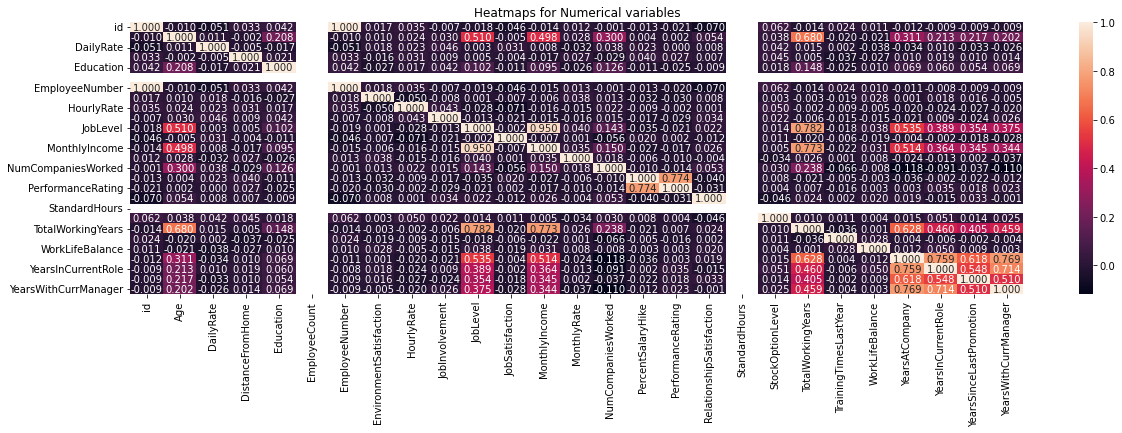

In [16]:
plt.figure(figsize=[20,5])
sns.heatmap(df.corr(), annot = True, fmt =".3f")
plt.title("Heatmaps for Numerical variables");

####**Observation:** ANSWER: THE FACTORS ARE: TOTAL WORKING YEARS, JOB LEVEL AND YEARS IN CURRENT ROLE

#What is the relationship between Education and Monthly Income?

In [ ]:
IncByEdu = df.groupby('Education')['MonthlyIncome'].mean()

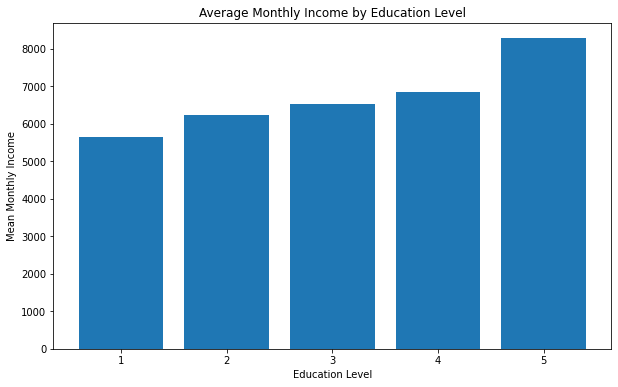

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(IncByEdu.index, IncByEdu)
plt.title("Average Monthly Income by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Mean Monthly Income")
plt.show;

####**Observation:** There is a positive relationship between Education and Monthly Income. That is, higher the education level, the higher the mean monthly income.

#What is the effect of age on attrition?

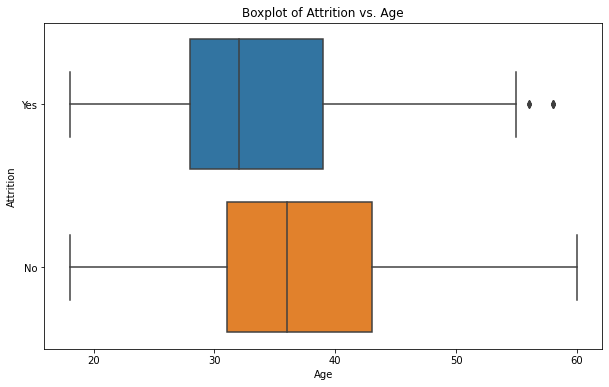

In [ ]:
import seaborn as sn
fig, ax = plt.subplots(figsize=(10, 6))
sn.boxplot(data=df, y="Attrition", x="Age",orient='h')
plt.title("Boxplot of Attrition vs. Age");

###**Observation:** Attrition seems to be more common amongst the younger employees than it is amongst the older employees.

#Is Income the main factor in employee attrition?

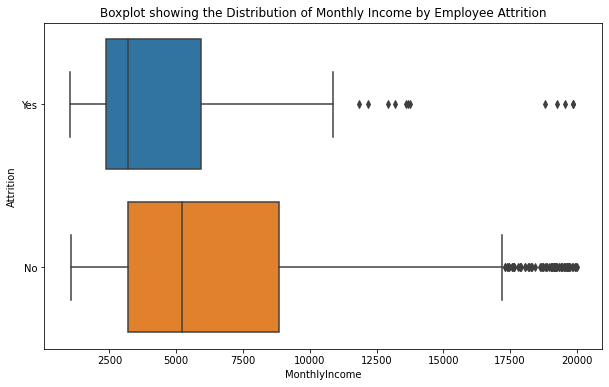

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sn.boxplot(data=df, y="Attrition", x="MonthlyIncome",orient='h')
plt.title("Boxplot showing the Distribution of Monthly Income by Employee Attrition");

####**Observation:** With the exception of a very few, those who attrited are obviously lesser paid than those who didn't. Hence, income seems to be a major significant factor, but it is definitely not the only factor.

#How does work-life balance impact the overall attrition rate?

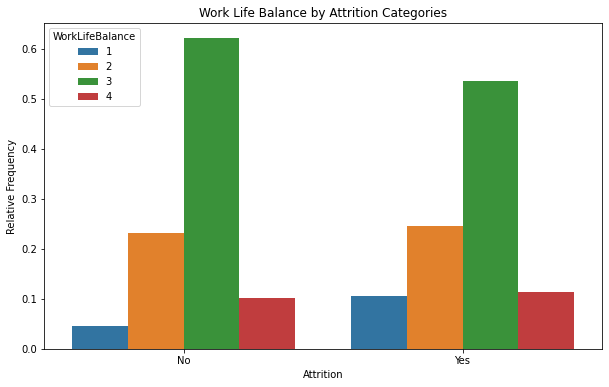

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sn.barplot(y="Relative Frequency",
            x="Attrition",
            hue="WorkLifeBalance",
            data=df.groupby('Attrition')['WorkLifeBalance'].value_counts(normalize=True).to_frame("Relative Frequency").reset_index()
)
plt.title("Work Life Balance by Attrition Categories");

####**Observation:** There is a uniform/identical distribution of work life balance in both categories of employee attrition. Therefore, work life balance doesn't have any significant impact on the overall attrition rate.